<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/decisiontree_randomforest_classification/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


**Content**

The datasets consists of several medical predictor variables and one target variable, Outcome.
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
## importing libraries:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## calling csv as data:
data  = pd.read_csv("/content/diabetic_clean.csv")
data.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
578,10,133,68,1,0,27.0,0.245,36,0
129,0,105,84,1,0,27.9,0.741,62,1
89,1,107,68,19,0,26.5,0.165,24,0


In [3]:
## checking the null values
print(f"\n null values:\n {data.isnull().sum()}\n")

## checking the sample:
print(f"\ndata_shape\n: {data.shape}\n")

## checking duplicated values:
print(f"duplicated values: {data.duplicated().sum()}\n")

# checking the info
data.info()


 null values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


data_shape
: (768, 9)

duplicated values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  


In [4]:
## spliting data into features and target values:
x = data.drop("Outcome",axis =1)
y = data["Outcome"]
print(f"shape of feature dataset:{x.shape}")
print(f"shape of target dataset:{y.shape}")

shape of feature dataset:(768, 8)
shape of target dataset:(768,)


In [5]:
# checking 'y' - target counts:
class_frequencies = pd.Series(y).value_counts()
print(class_frequencies)


0    500
1    268
Name: Outcome, dtype: int64


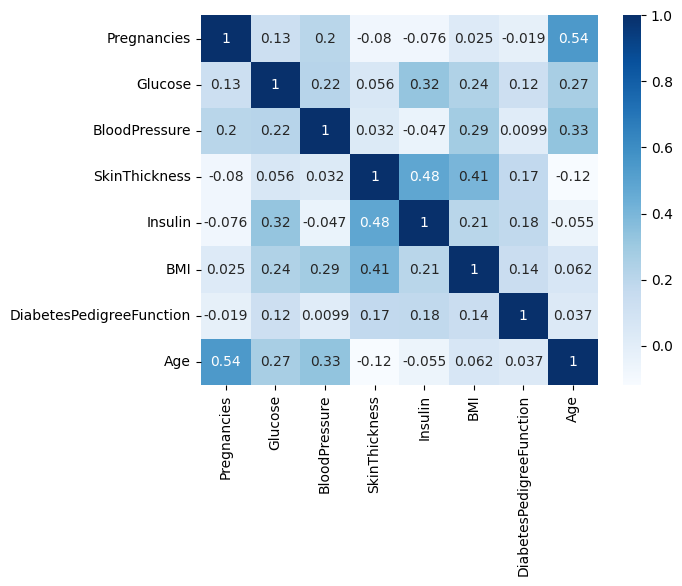

In [6]:
##plotting heatmap:
sns.heatmap(x.corr(), cmap='Blues',annot=True);

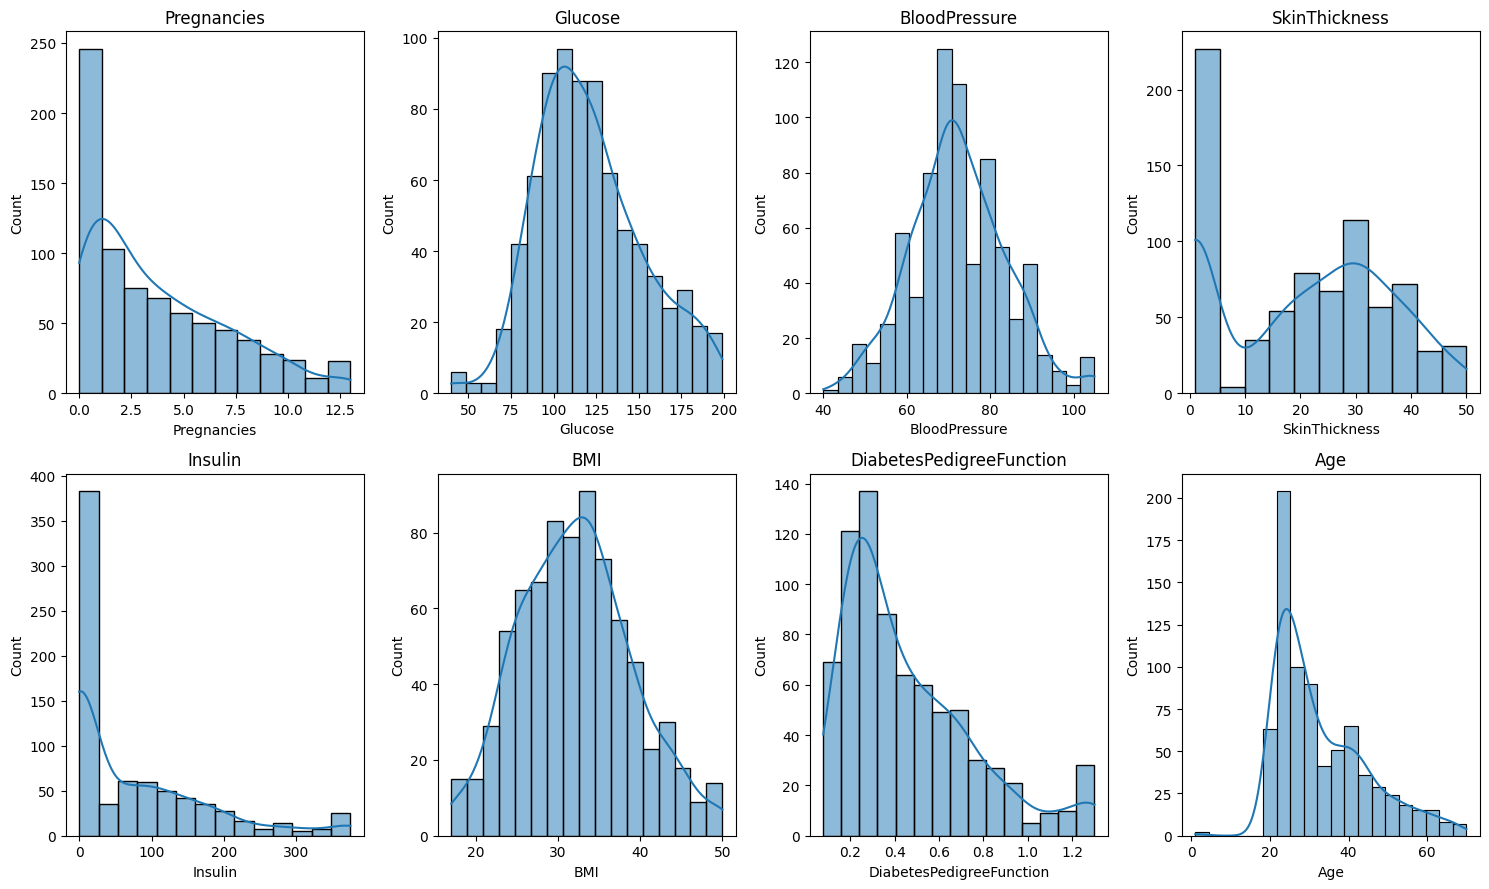

In [7]:
## ploting histplot:

num_rows = 2
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(x.columns):
    sns.histplot(x[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

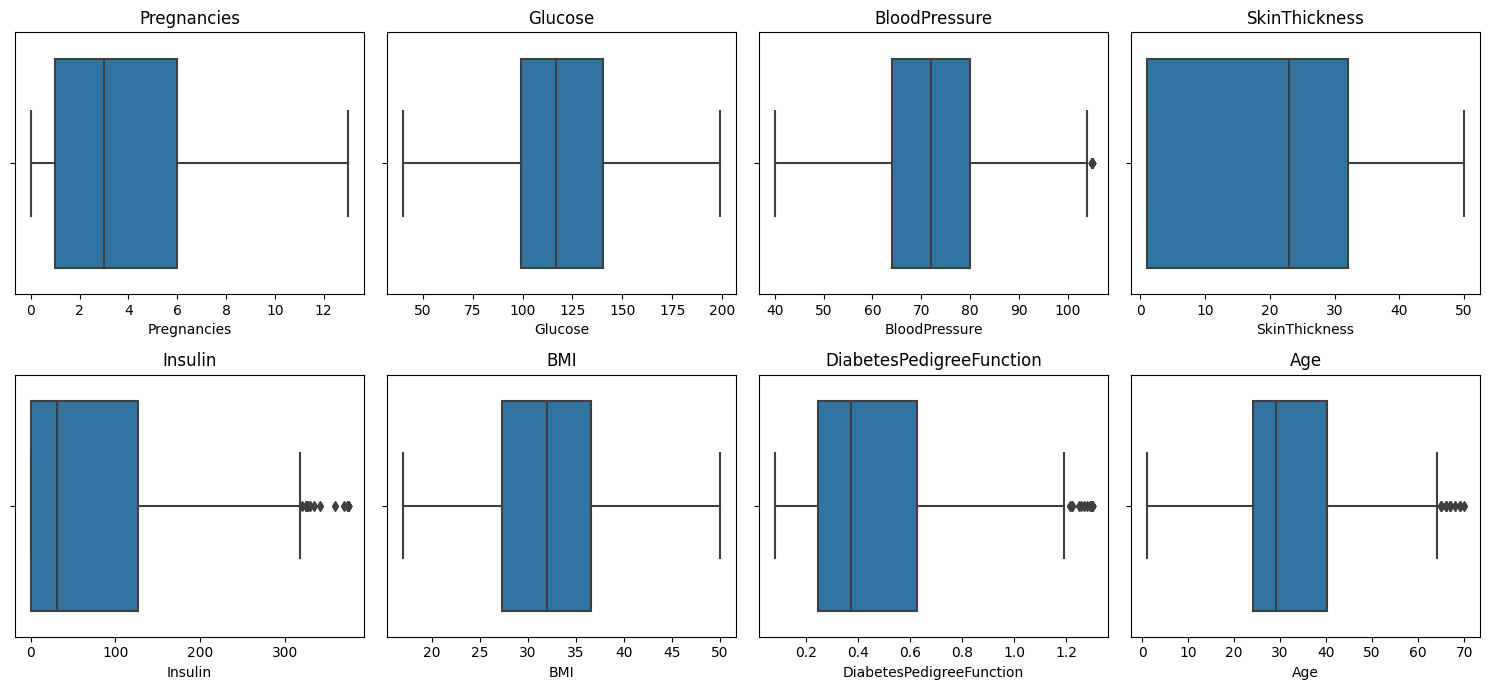

In [8]:
num_rows = 2
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(x.columns):
    sns.boxplot(data=data,x = col,ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [9]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.834635,3.336808,0.000,1.00000,3.0000,6.00000,13.0
Glucose,768.0,121.154948,31.137801,40.000,99.00000,117.0000,140.25000,199.0
BloodPressure,768.0,72.446615,11.509636,40.000,64.00000,72.0000,80.00000,105.0
SkinThickness,768.0,20.713542,15.231845,1.000,1.00000,23.0000,32.00000,50.0
Insulin,768.0,75.600260,99.048868,0.000,0.00000,30.5000,127.25000,375.0
BMI,768.0,32.171615,6.907363,17.000,27.30000,32.0000,36.60000,50.0
DiabetesPedigreeFunction,768.0,0.462083,0.294203,0.078,0.24375,0.3725,0.62625,1.3
Age,768.0,33.044271,11.663720,1.000,24.00000,29.0000,40.25000,70.0


In [10]:
## import from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from  imblearn.over_sampling import SMOTE

## train test split:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

## checking shape and dimention:
print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test.shape, x_test.ndim))

### resampling x_train and y_train
smote = SMOTE()
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

## checking shape of resampled data:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


## checking frequency of resampled data:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

shape of x_train(614, 8) and have dimension: 2
shape of y_train(614,) and have dimension: 1
shape of x_test(154, 8)  and have dimension: 2
shape of y_test(154,) and have dimension: 2
After OverSampling, the shape of train_X: (802, 8)
After OverSampling, the shape of train_y: (802,) 

After OverSampling, counts of label '1': 401
After OverSampling, counts of label '0': 401


In [11]:
## grid search: searching best parameter from given parameter:
"""
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2,4,6],
    'max_features': ['log2', 'sqrt'],
}
RFC = RandomForestClassifier()


# Create the GridSearchCV object
grid_search = GridSearchCV(RFC , param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 2)

grid_search.fit(x_train_res, y_train_res)
# Get the best hyperparameters
best_params = grid_search.best_params_

best_params
"""

"\nparam_grid = {\n    'n_estimators': [50, 100, 200],\n    'max_depth': [None, 5, 10],\n    'min_samples_split': [2, 5, 10],\n    'criterion': ['gini', 'entropy'],\n    'min_samples_leaf': [2,4,6],\n    'max_features': ['log2', 'sqrt'],\n}\nRFC = RandomForestClassifier()\n\n\n# Create the GridSearchCV object\ngrid_search = GridSearchCV(RFC , param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 2)\n\ngrid_search.fit(x_train_res, y_train_res)\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n\nbest_params\n"

```
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}
 ```

In [12]:
## training model
parameters = {
            'criterion': 'entropy',
            'max_depth': 10,
            'max_features': 'log2',
            'min_samples_leaf': 2,
            'min_samples_split': 10,
            'n_estimators': 100
            }

model = RandomForestClassifier(**parameters)
RFC_model = model.fit(x_train_res, y_train_res)

In [13]:
## import from sklearn:

from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

## making prediction:
y_pred = RFC_model.predict(x_test)

In [14]:
## printig report:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        99
           1       0.63      0.76      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.76       154



In [15]:
## printing f1 and accuracy score
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"f1_score : {round(f1,2)}")
print(f"accuracy_score: {round(acc,2)}")


f1_score : 0.69
accuracy_score: 0.75


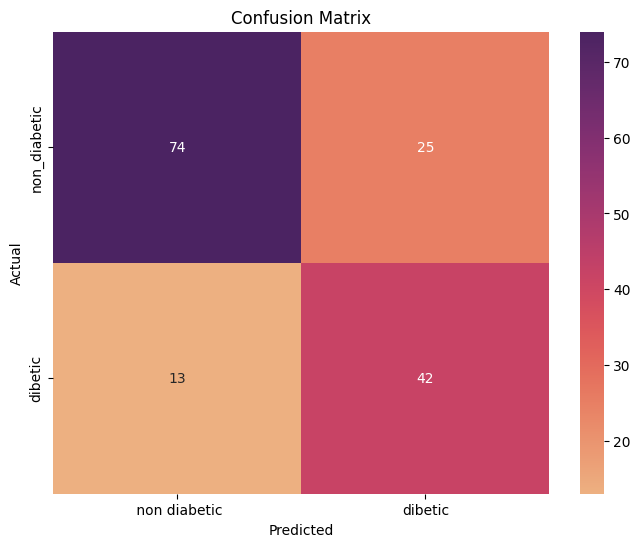

In [16]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure
plt.figure(figsize=(8, 6))

# Use Seaborn's heatmap to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='flare', cbar=True,
            xticklabels=[' non diabetic', 'dibetic'], yticklabels=['non_diabetic', 'dibetic'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

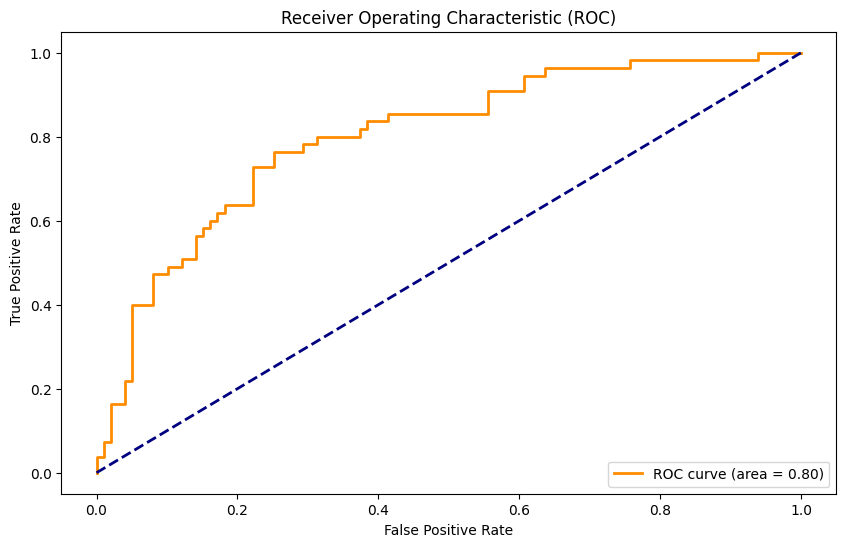

In [17]:
#dicted probabilities for class 1 (assuming it's a binary classification problem)
y_prob = model.predict_proba(x_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



In [18]:
## compairing the prediction with truth values:
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
"""
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""

prediction_result = []

j=0
for i in y_test:
    if i == y_pred[j]:
        results = "correct_prediction"
        prediction_result.append(results)

    else:
        results = "wrong_prediction"
        prediction_result.append(results)
    j = j+1



## for actual and pred naming:

class_name = ["Non_Diabetic", "Diabetic"]
y_test_class = []
y_pred_class = []

for y in y_test:
    y_test_class.append(class_name[y])

for yp in y_pred:
    y_pred_class.append(class_name[yp])



prediction_table = pd.DataFrame({'Actual': y_test_class, 'Predict' : y_pred_class , "prediction_result" : prediction_result })


y_pred dimensions : 1
y_test dimension : 1


In [19]:
prediction_table.sample(50)

,Actual,Predict,prediction_result
61,Non_Diabetic,Non_Diabetic,correct_prediction
29,Non_Diabetic,Non_Diabetic,correct_prediction
79,Non_Diabetic,Non_Diabetic,correct_prediction
105,Non_Diabetic,Non_Diabetic,correct_prediction
84,Non_Diabetic,Non_Diabetic,correct_prediction
92,Non_Diabetic,Non_Diabetic,correct_prediction
85,Diabetic,Diabetic,correct_prediction
152,Diabetic,Non_Diabetic,wrong_prediction
78,Non_Diabetic,Non_Diabetic,correct_prediction
133,Diabetic,Diabetic,correct_prediction


---
---
<br>
<br>

# votingclassifier

In [79]:
## importing algos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## param for random forest
parameters_RF = {
            'criterion': 'entropy',
            'max_depth': 10,
            'max_features': 'log2',
            'min_samples_leaf': 2,
            'min_samples_split': 10,
            'n_estimators': 100
            }

parameters_DT = {
            'criterion': 'entropy',
            'max_depth': 12,
            'max_features': 'log2',
            'min_samples_leaf': 14,
            'min_samples_split': 8,
            'splitter': 'best'
            }

# Define multiple base learners (Decision Tree,Random Forest)
base_learners = [
                ('Decision Tree', DecisionTreeClassifier(**parameters_DT)),
                ('Random Forest', RandomForestClassifier(**parameters_RF)),

            ]


In [80]:
# Define the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators = base_learners, voting='hard')
## training model:
vote_model = ensemble_model.fit(x_train_res, y_train_res)

## prediction:
y_pred = vote_model.predict(x_test)

In [81]:
## printig report:
report = classification_report(y_test, y_pred)

## printing f1 and accuracy score
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

## printing all
print(f"f1_score : {round(f1,2)}")
print(f"accuracy_score: {round(acc,2)}")
print(report)

f1_score : 0.65
accuracy_score: 0.75
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



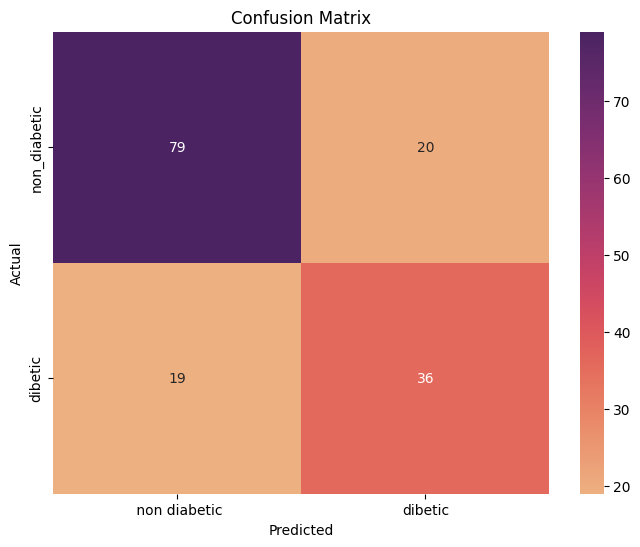

In [82]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure
plt.figure(figsize=(8, 6))

# Use Seaborn's heatmap to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='flare', cbar=True,
            xticklabels=[' non diabetic', 'dibetic'], yticklabels=['non_diabetic', 'dibetic'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

---
---

<br>

# BAGGING :

Bootstrap Aggregating, is an ensemble learning technique that aims to improve the stability and accuracy of machine learning algorithms.
It works by training multiple instances of a base learning algorithm on different subsets of the training data and then combining their predictions.

In [88]:
## param for random forest
parameters_RF = {
            'criterion': 'entropy',
            'max_depth': 10,
            'max_features': 'log2',
            'min_samples_leaf': 2,
            'min_samples_split': 10,
            'n_estimators': 100
            }
for estimate in range(1,30,1):
    # Define the Bagging Classifier with multiple base learners
    bagging_model = BaggingClassifier(RandomForestClassifier(**parameters_RF), n_estimators=estimate)

    # Train the Bagging model
    bagging_model.fit(x_train_res, y_train_res)

    # Predict on the test set
    y_pred = bagging_model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy of Bagging Classifier with estimator {estimate}: {accuracy:.2f}')



Accuracy of Bagging Classifier with estimator 1: 0.75
Accuracy of Bagging Classifier with estimator 2: 0.72
Accuracy of Bagging Classifier with estimator 3: 0.75
Accuracy of Bagging Classifier with estimator 4: 0.75
Accuracy of Bagging Classifier with estimator 5: 0.72
Accuracy of Bagging Classifier with estimator 6: 0.72
Accuracy of Bagging Classifier with estimator 7: 0.75
Accuracy of Bagging Classifier with estimator 8: 0.71
Accuracy of Bagging Classifier with estimator 9: 0.73
Accuracy of Bagging Classifier with estimator 10: 0.73
Accuracy of Bagging Classifier with estimator 11: 0.75
Accuracy of Bagging Classifier with estimator 12: 0.75
Accuracy of Bagging Classifier with estimator 13: 0.71
Accuracy of Bagging Classifier with estimator 14: 0.73
Accuracy of Bagging Classifier with estimator 15: 0.76
Accuracy of Bagging Classifier with estimator 16: 0.73
Accuracy of Bagging Classifier with estimator 17: 0.74
Accuracy of Bagging Classifier with estimator 18: 0.72
Accuracy of Bagging

In [89]:
## printig report:
report = classification_report(y_test, y_pred)

## printing f1 and accuracy score
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

## printing all
print(f"f1_score : {round(f1,2)}")
print(f"accuracy_score: {round(acc,2)}")
print(report)

f1_score : 0.68
accuracy_score: 0.74
              precision    recall  f1-score   support

           0       0.85      0.73      0.78        99
           1       0.61      0.76      0.68        55

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.74      0.75       154



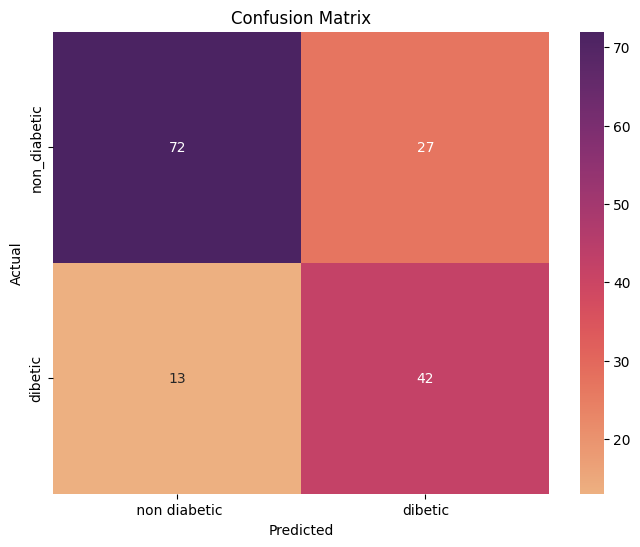

In [90]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure
plt.figure(figsize=(8, 6))

# Use Seaborn's heatmap to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='flare', cbar=True,
            xticklabels=[' non diabetic', 'dibetic'], yticklabels=['non_diabetic', 'dibetic'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()